In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [4]:
data = pd.read_csv("ca_nn_zip.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)

In [13]:
data_1 = data[data["disp"] == 1].sample(n=200000)
data_0 = data[data["disp"] == 0].sample(n=200000)
data_model = data_1.append(data_0)

In [14]:
# info = data_model[["judge", "close_date", "dist"]]
# data_model.drop(["judge", "close_date", "dist"], axis=1, inplace=True)
# train = train.iloc[:, 1:]
X = data_model.drop("disp", axis=1)
y = data_model["disp"]

In [ ]:
# train = pd.read_csv("train_data.csv")
# test = pd.read_csv("test_data.csv")

In [ ]:
# train.drop(["judge", "close_date", "dist"], axis=1, inplace=True)
# train = train.iloc[:, 2:]
# X_train = train.iloc[:, 1:]
# y_train = train.iloc[:, 0]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
data_dict = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
import pickle
pickle.dump(data_dict, open("data_model.pickle", "wb"))

In [90]:
data_dict = pickle.load(open("data_model.pickle", "rb"))

In [91]:
X_train = data_dict["X_train"]; X_test = data_dict["X_test"]; y_train = data_dict["y_train"]; y_test = data_dict["y_test"]

In [92]:
X_train = X_train.reset_index().drop("index", axis=1)

In [93]:
X_train.drop(["judge", "close_date", "dist"], axis=1, inplace=True)

In [94]:
y_train = y_train.reset_index()["disp"]

In [95]:
model = LogisticRegression(C=0.1)

In [3]:
Train_all=pd.read_csv('train_data.csv')
Test_all=pd.read_csv('test_data.csv')

In [4]:
X_train=Train_all.drop('Unnamed: 0',axis=1).drop('Unnamed: 0.1',axis=1).drop('disp')

,Unnamed: 0,Unnamed: 0.1,judge,disp,close_date,0,1,2,3,4,...,196,197,198,199,dist,population,EMP,QP1,AP,EST
0,8373916,8373916,gropper,1,2005.0,-0.001021,-0.005550,-0.158378,-0.174647,-0.050897,...,0.144047,0.041898,0.097750,0.097685,nysb,1.295829,-0.245917,-0.207938,-0.237941,-0.014887
1,832706,832706,ray,0,2001.0,0.107506,-0.091913,-0.078899,0.029590,-0.069429,...,0.078276,-0.140648,-0.111570,-0.061985,flsb,3.272111,2.028752,1.174597,1.360393,3.696264
2,11542043,11542043,bishop,0,2004.0,0.080675,0.090888,-0.044058,0.040248,-0.145228,...,0.030557,0.049069,0.032838,0.007485,scb,-0.362766,-0.427924,-0.266434,-0.306593,-0.531797
3,5931345,5931345,zive,1,2002.0,-0.078478,0.196416,0.266431,0.038255,-0.063111,...,-0.056290,0.186726,-0.112553,0.098445,nvb,0.713212,0.651378,0.314474,0.434019,1.350286
4,10893858,10893858,dow,1,2005.0,0.227382,0.042654,0.041298,0.071445,-0.245597,...,-0.068924,-0.117925,0.088365,-0.034923,mowb,-0.421810,-0.423024,-0.272311,-0.316323,-0.441669


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1729)

test_fold = [-1]*len(X_train) + [0]*len(X_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)
param_grid = [{'max_depth':[10,15,20],'learning_rate':[0.1,0.02,0.005],'n_estimators':[10,50,500]},
              'min_child_weight':[1,5,20],'subsample':[0.6,0.8,0.85]]
kernel_estimator = xgb.XGBClassifier()
grid = GridSearchCV(kernel_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                    #n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((X_train,X_test)),np.append(y_train.values,y_test.values))

In [ ]:

print(X_train.shape, X_test.shape)

xlf = xgb.XGBClassifier(max_depth=10, 
                        learning_rate=0.1, 
                        n_estimators=10, 
                        silent=True, 
                        objective='reg:linear', 
                        nthread=-1, 
                        gamma=0,
                        min_child_weight=1, 
                        max_delta_step=0, 
                        subsample=0.85, 
                        colsample_bytree=0.7, 
                        colsample_bylevel=1, 
                        reg_alpha=0, 
                        reg_lambda=1, 
                        scale_pos_weight=1, 
                        seed=1440, 
                        missing=None)

xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=100)

preds = xlf.predict(X_test)

In [96]:
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
X_test = X_test.reset_index().drop("index", axis=1)
y_test = y_test.reset_index()["disp"]

In [98]:
info = X_test[["judge", "close_date", "dist"]]
X_test.drop(["judge", "close_date", "dist"], axis=1, inplace=True)

In [99]:
y_pred = model.predict(X_test)

In [116]:
model.score(X_test, y_test)

0.641780303030303

In [112]:
y_pred.sum()/len(y_pred)

0.49562121212121213

In [101]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.63953558, 0.64406469]),
 array([0.64645867, 0.63712104]),
 array([0.64297849, 0.64057405]),
 array([65865, 66135]))

In [102]:

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)

0.6968138682122931

In [103]:
info["judge_dist"] = info["judge"] + " " + info["dist"]

/home/yn811/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


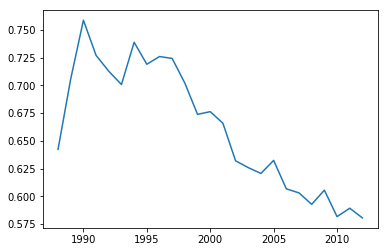

In [105]:
years = info.groupby("close_date").count()
years = np.array(sorted(years.index[years["judge"] > 100]))
years = years[years > 0]
precisions = []
for year in years:
    index = (info["close_date"] == year)
    x = X_test[index]
    y = y_test[index]
    precisions.append(model.score(x, y))
plt.plot(years, precisions)

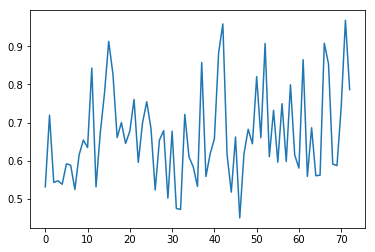

In [107]:
dists = info.groupby("dist").count()
dists = dists.index[dists["judge"] > 100]
precisions = []
for dist in dists:
    index = (info["dist"] == dist)
    x = X_test[index]
    y = y_test[index]
    precisions.append(model.score(x, y))
plt.plot(precisions)

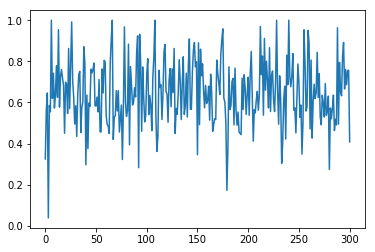

In [108]:
judges = info.groupby("judge_dist").count()
judges = judges.index[judges["judge"] > 100]
precisions = []
for judge in judges:
    index = (info["judge_dist"] == judge)
    x = X_test[index]
    y = y_test[index]
    precisions.append(model.score(x, y))
plt.plot(precisions)

In [109]:
for judge in judges[np.array(precisions) == 1]:
    if not (y_test[info["judge_dist"] == judge].count() == y_test[info["judge_dist"] == judge].sum()):
        print(judge)

In [110]:
perc = []
for judge in judges[np.array(precisions) < 0.6]:
    perc.append(y_test[info["judge_dist"] == judge].sum() / y_test[info["judge_dist"] == judge].count())

(array([ 1.,  0.,  8., 18., 45., 44.,  6.,  2.,  0.,  1.]),
 array([0.03846154, 0.13461538, 0.23076923, 0.32692308, 0.42307692,
        0.51923077, 0.61538462, 0.71153846, 0.80769231, 0.90384615,
        1.        ]),
 <a list of 10 Patch objects>)

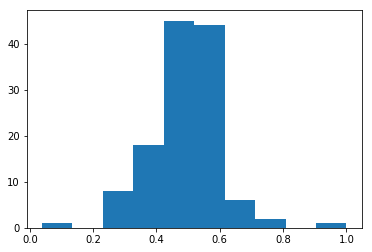

In [111]:
plt.hist(perc)

In [6]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
train.drop(["judge", "close_date", "dist"], axis=1, inplace=True)
train = train.iloc[:, 2:]
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
test.drop(["judge", "close_date", "dist"], axis=1, inplace=True)
test = test.iloc[:, 2:]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [7]:
xlf = xgb.XGBClassifier()
xlf.fit(X_train, y_train, eval_set = [(X_test, y_test)])

[0]	validation_0-error:0.144477
[1]	validation_0-error:0.144375
[2]	validation_0-error:0.144375
[3]	validation_0-error:0.144328
[4]	validation_0-error:0.143942
[5]	validation_0-error:0.144359
[6]	validation_0-error:0.144446
[7]	validation_0-error:0.144548
[8]	validation_0-error:0.144847
[9]	validation_0-error:0.145225
[10]	validation_0-error:0.145225
[11]	validation_0-error:0.145225
[12]	validation_0-error:0.145225
[13]	validation_0-error:0.145225
[14]	validation_0-error:0.145225
[15]	validation_0-error:0.145225
[16]	validation_0-error:0.145225
[17]	validation_0-error:0.145225
[18]	validation_0-error:0.145225
[19]	validation_0-error:0.145225
[20]	validation_0-error:0.145225
[21]	validation_0-error:0.145225
[22]	validation_0-error:0.145225
[23]	validation_0-error:0.145225
[24]	validation_0-error:0.145225
[25]	validation_0-error:0.145225
[26]	validation_0-error:0.145115
[27]	validation_0-error:0.145115
[28]	validation_0-error:0.145115
[29]	validation_0-error:0.145115
[30]	validation_0-er

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [9]:
y_pred=xlf.predict(X_test)

C:\Applications\Programming\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [12]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.59042928, 0.85981055]),
 array([0.04547179, 0.99464088]),
 array([0.08444042, 0.92232421]),
 array([ 18451, 108600], dtype=int64))

In [16]:
y_prob = xlf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)

0.7363796853604485

In [100]:
y_pred.sum()/len(y_pred)

0.49562121212121213

In [17]:
xlf.score(X_test, y_test)

C:\Applications\Programming\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8567976639302327